In [1]:
'''
landcover classification legend

number 	landcover type 
0	no data
1	Extraction Sites
3	Inland Waterbodies
4	Salt Lakes
5	Irrigated Cropping
6	Irrigated Pasture
7	Irrigated Sugar
8	Rainfed Cropping
9	Rainfed Pasutre
10	Rainfed Sugar
11	Wetlands
14	Tussock Grasses - Closed
15	Alpine Grasses - Open
16	Hummock Grasses - Open
18	Tussock Grasses - Open
19	Shrubs and Grasses - Sparse-Scattered
24	Shrubs - Closed
25	Shrubs - Open
31	Trees - Closed
32	Trees - Open
33	Trees - Scattered
34	Trees - Sparse
35	Built up area '''


'\nlandcover classification legend\n\nnumber \tlandcover type \n0\tno data\n1\tExtraction Sites\n3\tInland Waterbodies\n4\tSalt Lakes\n5\tIrrigated Cropping\n6\tIrrigated Pasture\n7\tIrrigated Sugar\n8\tRainfed Cropping\n9\tRainfed Pasutre\n10\tRainfed Sugar\n11\tWetlands\n14\tTussock Grasses - Closed\n15\tAlpine Grasses - Open\n16\tHummock Grasses - Open\n18\tTussock Grasses - Open\n19\tShrubs and Grasses - Sparse-Scattered\n24\tShrubs - Closed\n25\tShrubs - Open\n31\tTrees - Closed\n32\tTrees - Open\n33\tTrees - Scattered\n34\tTrees - Sparse\n35\tBuilt up area '

In [14]:
#load requiered modules 
import numpy as np
import rasterio
#from matplotlib import pyplot as plt #don't need unless want to plot
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import os
import gdal
from osgeo import osr

In [3]:

#set up filepath due to folder re-arrangement 
os.chdir('/g/data/r78/ck9738/')

In [4]:
#load in geotifs using rasterio, trun into an xarray :
#enter filename as a string, include subfolders!!
#previous_version DLCD found in old_DLCD, new in new_DLCD.

#use this command to print a list of all file in respective folder : 

def load_gfif(file_name, x):
    #file_string = 'old_DLCD/'+file_name+'.tif'

    dataset = rasterio.open(file_name) #open using Raterio
    {i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}
    data_array = dataset.read(x) #read selected band into np array
    #year_xr = xr.DataArray(data_array) #turn into Xr array for fuctionality #Now don't need xr yet
    return(data_array) #return np array into program 
    


old_version = load_gfif('old_DLCD/DLCDv2_2009_20101.tif',1)#for old dlcd files all only have ONE band (are single year)

new_version = load_gfif('new_DLCD/DLCDv2_2016_new.tif',9)#for new DLCD band number corrosponds to year in following table

In [5]:

small_old = old_version[1::200,1::200]
values_please = np.unique(small_old)
values_please

array([ 0,  3,  4,  5,  6,  7,  8,  9, 11, 14, 16, 18, 19, 24, 25, 31, 32,
       33, 34, 35], dtype=uint8)

In [10]:
# define function to return the number of pixles which are class A in old and class B in new:
#fuction returns an array, int: array with 1= occurance of class overlap and 0= everything else.

def count_overlap_array(old_np,A,new_np,B):
    raw_np = np.ones_like(old_np) #generate a np with the same size as the dlcd but full of 1 values
    raw_xr = xr.DataArray(raw_np) #turn to xarray for it's useful fuctionality
    count_old = raw_xr.where(old_np==A) # make an xr where 1= presance of class A, 0= absence 
    count_new = count_old.where(new_np==B) # make an xr where 1= overlap of classes A&B
    count_class = count_new.fillna(0) #replaces all the nan with 0
    howmuch_name = np.count_nonzero(count_class) #counts the number of non 0 in the xaray
    count_class = np.array(count_class)

    return(count_class) #returns an np array

def count_type(in_xr, X):
    raw_np = np.ones_like(in_xr)
    raw_xr = xr.DataArray(raw_np)
    count_name = raw_xr.where(in_xr==X) #makes a xarray with just the selected class an nan values
    count_name = count_name.fillna(0) #replaces all the nan with 0
    howmuch_name = np.count_nonzero(count_name) #counts the number of non 0 in the xaray
    count_class = np.array(count_name)
    return(count_class) #returns a np array with only contains pixles of the specified LC class 

In [16]:
new_water = count_type(old_version,19)

small_water = new_water[1::100,1::100]

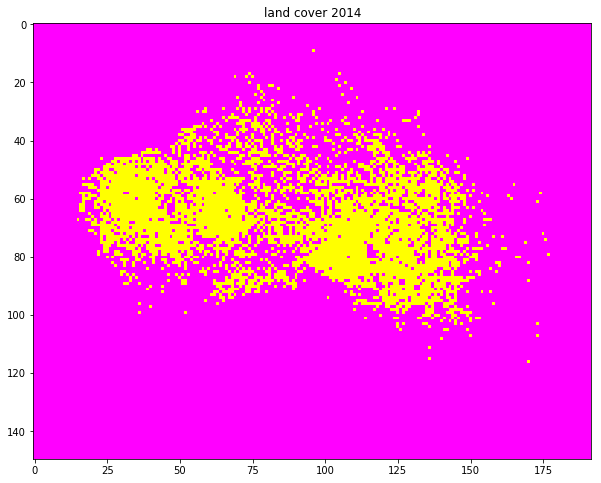

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('land cover 2014')
#plt.legend(handles=handle_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.imshow(small_water, cmap='spring', interpolation='nearest')


In [18]:
dst_filename = 'ripe_veg_random.tiff'
x_pixles = 19161 #number of pixles on x axis
y_pixles = 14902 #number of pixles on y axis
driver = gdal.GetDriverByName('GTiff')
outgoing_data = driver.Create(dst_filename, x_pixles, y_pixles, 1,gdal.GDT_Float32)

outgoing_data.SetGeoTransform([444720, 30, 0, 3751320, 0, -30])
srs = osr.SpatialReference()
srs.SetUTM(11,1)
srs.SetWellKnownGeogCS("GDA2020")
outgoing_data.SetProjection(srs.ExportToWkt())

outgoing_data.GetRasterBand(1).WriteArray(new_water)





0

In [19]:
outgoing_data = None 